# NOTE

There is another python package `pip install archetypes`.  This implementation throws error, and you need to remove the code line from the src file: 

    X = self._validate_data(X, dtype=[np.float64, np.float32])
    
It also doesn't have `explained_variance_` field. 

Recommend not use that package.

#### Authors: Benyamin Motevalli, Amanda Barnard

**email:** benyamin.motevalli@data61.csiro.au

# Introduction

**archetypes.py** is a python package developed in DATA61 (CSIRO) that implements the "Archetpye Analysis" by Adele Cutler and Leo Breiman, Technometrics, November 1994, Vol.36, No.4, pp. 338-347. The aim is to make the package consistent with sklearn library for the machine learning community. Accordingly, the package has three main functions: **fit, fit_transform, and transform**. In addition, a number of utility functions are included in the package that provides a range of visualisation functionalities. This tutorial demonstrates how to use this package.

# Required Packages

- numpy
- scipy.optimize
- matplotlib
- pandas

# Archetypal Analysis for Skeleton Data Set

The skeleton data set is an interesting real world case, which was also used in: **From Spider-Man to Hero -- Archetypal Analysis in R**. The set includes 507 data from which 247 are men and 260 are women. The data was collected by Heinz et al. (Heinz G, Peterson LJ, Johnson RW, Kerk CJ (2003). “Exploring Relationships in Body Dimensions.” Journal of Statistics Education, 11(2). URL http://www.amstat.org/publications/jse/v11n2/datasets.heinz.html). The features are the body girth measurements, skeleton diameter, age, weight, height, and gender. Here we show how to use our archetype analysis package to extract the archetypes as demonstrated in the R package, as well visualising the archetype profiles, finding the most archetypal data points, mapping and visualising data points in the archetype space, and the use of radar plots to visualise the contributions of the archetypes in describing any other data point.

**Let's get started!**

In [25]:
%load_ext autoreload
%autoreload 2
from archetypes import *
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Get the Data

The skeleton data set is downloaded from the following link: 'http://jse.amstat.org/datasets/body.dat.txt'

In [19]:
import requests
url = 'http://jse.amstat.org/datasets/body.dat.txt'
r = requests.get(url)
data = np.array(list(map(lambda x: list(map(float, x.split())), r.text.splitlines())))
print(data.shape)

(507, 25)


## Using similar columns of data to "From Spider-Man to Hero -- Archetypal Analysis in R"

As seen, skeleton data set has 25 features, however, only 11 were used in **From Spider-Man to Hero -- Archetypal Analysis in R**. Here, we will use similar dataset so that users could compare the results. We also try to order the columns in the similar order that appears in R package.

In [20]:
columns = ['AnkleDiam', 'KneeDiam', 'WristDiam', 'Bitro', 'Biil',
        'ElbowDiam', 'ChestDiam', 'ChestDp', 'Biac', 'Height', 'Gender']

gender = {1.0: 'male', 0.0: 'female'}

selected_cols = [8, 7, 6, 2, 1, 5, 4, 3, 0, 23, 24]
df = pd.DataFrame(data[:, selected_cols], columns = columns)
df['Gender'] = df.apply(lambda row: gender[row['Gender']], axis = 1)

In [21]:
df.sample(10)

,AnkleDiam,KneeDiam,WristDiam,Bitro,Biil,ElbowDiam,ChestDiam,ChestDp,Biac,Height,Gender
183,15.2,20.5,11.5,34.0,31.3,15.7,32.6,23.0,43.2,188.0,male
368,12.5,18.8,9.2,31.4,27.1,12.8,27.5,16.5,38.7,161.3,female
442,13.8,18.8,10.2,33.1,29.0,12.2,25.9,16.3,38.9,168.9,female
382,12.2,16.9,9.0,29.8,27.7,11.2,25.0,17.0,36.4,158.2,female
366,12.4,17.9,9.8,31.0,20.3,11.6,26.8,17.3,34.8,163.2,female
51,14.2,19.8,11.4,30.8,26.1,15.1,30.8,20.6,38.5,174.0,male
142,15.6,19.6,11.5,31.7,27.8,14.3,28.7,20.2,42.1,190.5,male
449,13.8,17.2,9.6,31.1,27.8,12.9,25.9,19.9,37.6,162.6,female
268,14.4,21.5,10.6,32.7,29.6,13.7,28.7,21.3,38.0,175.0,female
55,13.0,18.8,10.4,30.2,25.2,13.2,26.4,17.0,38.3,163.0,male


In [22]:
lst_feat = ['AnkleDiam', 'KneeDiam', 'WristDiam', 'Bitro', 'Biil',
        'ElbowDiam', 'ChestDiam', 'ChestDp', 'Biac', 'Height']

## Scaling the data

In [23]:
sc = StandardScaler()
X = df[lst_feat].values
X_scaled = sc.fit_transform(X)

## Creating an archetype instance

In [36]:
%run archetypes.py

### Description of arguments

**n_archetypes**: defines how many archetypes will be extracted. A positive integer. Note n_archetypes = 1 would return the mean of the data set (see "Archetpye Analysis" by Adele Cutler and Leo Breiman, Technometrics, November 1994, Vol.36, No.4, pp. 338-347.) <br><br>
**tolerance**: defines when to stop optimisation. It checks convergence of residual sum of squares (RSS) <br>
**max_iter**:       maximum number of iterations for optmisation. <br><br>
**random_state**:   random seed number. <br><br>
**C**:              the weight on the constraint equation. Smaller is the weight, stronger is the constraint. Constraint Eq.: $$\sum\alpha = 1,$$ $$\sum\beta = 1$$

**initialize**: three different initialization techniques are implemented:
- 'random': randomly selects a set of archetypes from the feature space. 
- 'random_idx': randomly selects a set of data points as initial archetypes.
- 'furthest_sum': Uses the furthest sum to efficiently initialize the archetypes. The idea is taken from a recent paper: Archetypal analysis for machine learning and data mining, Morten Morup and Lars Kai Hansen. 

**redundancy_try**: Depending on the initialisation, the set of archetypes may be redundant. Once redundancy occurs, alfa values corresponding to the redundant archetype becomes zero. In such circumstance, the algorithm searches for new candidate point to resolve redundancy. redundancy_try controls the number of tries by the algorithm to resolve redundancy. If not resolved, algorithm reduces the number of archetypes. For details on this issue, refer to "Archetpye Analysis" by Adele Cutler and Leo Breiman, Technometrics, November 1994, Vol.36, No.4, pp. 338-347.

In [30]:
AA = ArchetypalAnalysis(n_archetypes = 3, 
                        tolerance = 0.001, 
                        max_iter = 200, 
                        random_state = 0, 
                        C = 0.0001, 
                        initialize = 'random',
                        redundancy_try = 30)

## Extract archetypes

In [31]:
AA.fit(X_scaled)

## Some Attributes

**.explained_variance_** returns the variance explained by the archetype set. It can be used as a measure to identify
number of archetypes (e.g. using elbow plot)

In [32]:
print(AA.explained_variance_)

0.7324244835273135


**.archetpyes** returns the extracted archetypes. Note that the array shape is n_features x n_archetypes

In [33]:
AA.archetypes
AA.archetype_profile

array([[ 1.64142251, -1.63556388, -0.41104381],
       [ 1.51133495, -1.90783359,  0.12851005],
       [ 1.74476892, -1.57824246, -0.57463013],
       [ 0.9860047 , -2.34747256,  1.42673514],
       [ 0.58064774, -2.29888571,  1.71091309],
       [ 1.7218492 , -1.73944997, -0.4928031 ],
       [ 1.65510541, -1.47581134, -0.49410954],
       [ 1.36494003, -1.24889453, -0.33177493],
       [ 1.68887813, -1.50742182, -0.63055418],
       [ 1.57362148, -1.50245949, -0.41817702]])

**.archetype_profile** provides the profile of the archetypes. It shows each archetype is high in which features and low in which. **.archetype_profile** has similar shape to **.archetypes**. Furhter, the numbers are between 0 to 1. You can multiply it by 100 to convert them to percentange. 

In [34]:
AA.archetype_profile

array([[0.94477318, 0.04930966, 0.35897436],
       [0.91913215, 0.01972387, 0.58382643],
       [0.96449704, 0.04733728, 0.32938856],
       [0.82840237, 0.01380671, 0.91321499],
       [0.7199211 , 0.01380671, 0.96449704],
       [0.96646943, 0.0295858 , 0.34319527],
       [0.94477318, 0.04733728, 0.36291913],
       [0.90532544, 0.0887574 , 0.42209073],
       [0.95857988, 0.05325444, 0.30374753],
       [0.93096647, 0.05325444, 0.34516765]])

**NOTE**: You can also have access to number of archetypes as well as optimised $\alpha$ and $\beta$ through **.n_archertypes**, **.alfa**, and **.beta**. 

# Selecting number of archetypes with elbow plot

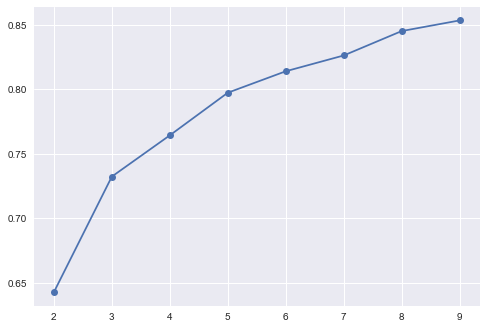

In [35]:
n_archs = list(range(2, 10))

lst_exp_var = []
for n_arch in n_archs:
    AA = ArchetypalAnalysis(n_archetypes = n_arch, 
                        tolerance = 0.001, 
                        max_iter = 200, 
                        random_state = 0, 
                        C = 0.0001, 
                        initialize = 'random',
                        redundancy_try = 30)
    AA.fit(X_scaled)
    lst_exp_var.append(AA.explained_variance_)

plt.style.use('seaborn')
plt.plot(n_archs, lst_exp_var, '-o')
plt.show()

As seen, elbow occurs with three archetypes. Hence, we continue with three archetypes. Also, with three archetypes you can compare the results with the ones reported in **From Spider-Man to Hero -- Archetypal Analysis in R**.

In [13]:
AA = ArchetypalAnalysis(n_archetypes = 3, 
                        tolerance = 0.001, 
                        max_iter = 200, 
                        random_state = 0, 
                        C = 0.0001, 
                        initialize = 'random',
                        redundancy_try = 30)

AA.fit(X_scaled)

## Simplex plot: Mapping datapoints to archetype convex hull

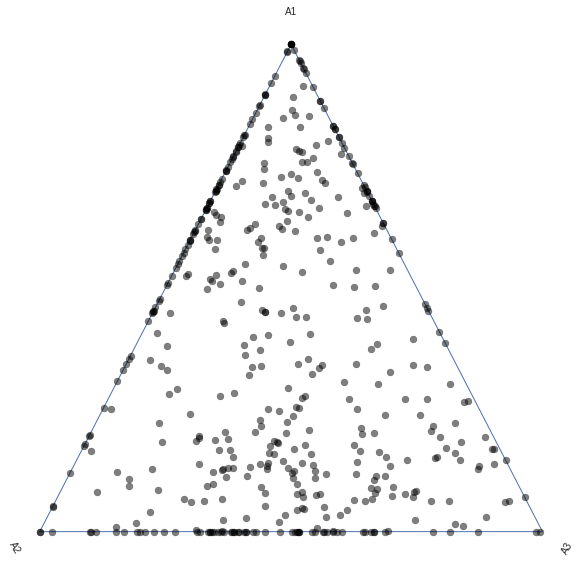

In [14]:
AA.plot_simplex(AA.alfa)

### Enriching Simplex Plot

For a rich visualisation you have the flexibility to assign attributes to the data point. Three main properties can be controlled: marker color, marker shape, and marker size.

#### Initializing the df_args

In [15]:
df_args = df[['Gender']]

In [16]:
df_args['color'] = 'red'
df_args['color'][df_args['Gender']=='female'] = 'blue'

df_args['marker'] = 'v'
df_args['marker'][df_args['Gender']=='female'] = 's'

df_args['size'] = df[['Height']]

plot_args = {'color': df_args['color'], 's': df_args['size'], 'marker': df_args['marker']}

/apps/python/3.6.1/lib/python3.6/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/apps/python/3.6.1/lib/python3.6/site-packages/pandas/core/generic.py:8682: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/apps/python/3.6.1/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


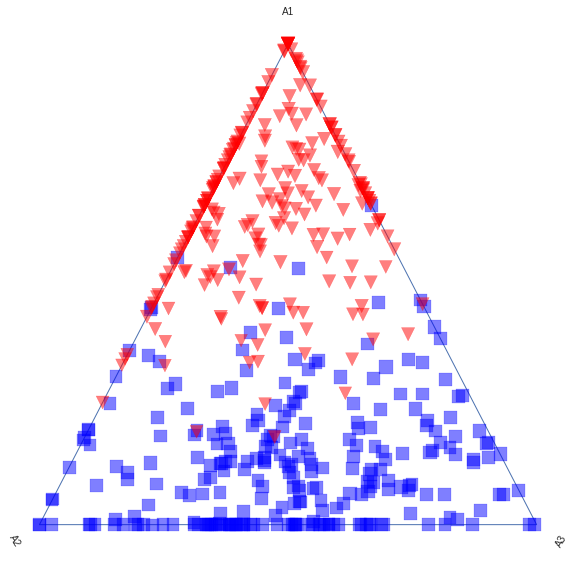

In [17]:
AA.plot_simplex(AA.alfa, plot_args)

# More flexibilty to visualise data in Simplex Plots

Additional utility functions are included in the package to give more flexibities to create simplex plots and color the data points in different fashions. To do this, three steps should be taken. First, you need to create the simplex plot frame with **create_simplex_ax** utility function, then you need to map the **alfa** values to the simplex frame using the **map_alfa_to_simplex** utility function, at last you can use standard matplotlib scatter plot to visualise data points. Let's see how it works.

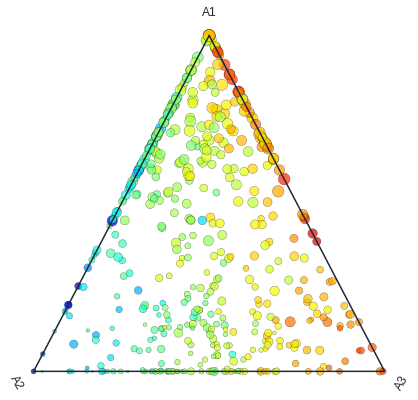

In [18]:
# STEP 1: Create Simplex plot. You can control the color of gridlines and borders (edges) of the simplex plots. 
# You can also control the fontcolor as well as figure size
create_simplex_ax(AA, grid_on = True, 
                  gridcolor = '#EAECEE', 
                  bordercolor='#1C2833', 
                  fontcolor = '#1C2833',
                  fig_size=[7,7])

# STEP 2: Map the alfa values to simplex plot
mapped_alfa = map_alfa_to_simplex(AA.alfa, AA)

# STEP 3: Use scatter plots to add the mapped alfa to simplex frame.
# The data points are colored by 'Biil' attribute, while sizes are correlated to normalised 'ChestDiam'
df['ChestDiamNorm'] = (df['ChestDiam'] - df['ChestDiam'].min()) / (df['ChestDiam'].max() - df['ChestDiam'].min())
plt.scatter(mapped_alfa[:,0], mapped_alfa[:,1], 
            c = df['Biil'], 
            cmap = 'jet', 
            s = df['ChestDiamNorm'] * 150, 
            alpha = 0.7, 
           edgecolor = 'black')
plt.show()


# Mapping other points to the simplex plot

You can use the functionalities in the package to map any other point to the simplex plot. For example, you can map the prototypes of your clusters to the plot and observe its relative location with other prototypes as well as the dataset. Here, for the purpose of illustration we calculate an average Male and Female and will show it on the plot.

In [19]:
X_ave_male = X_scaled[df['Gender']=='male'].mean(axis=0).reshape(1,-1)
X_ave_female = X_scaled[df['Gender']=='female'].mean(axis=0).reshape(1,-1)

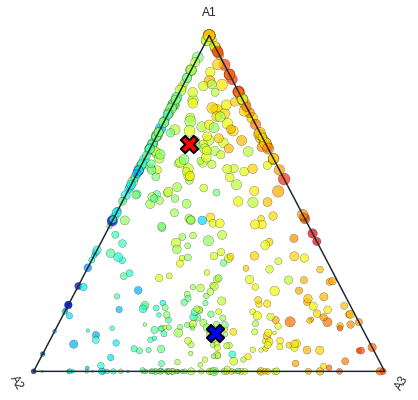

In [20]:
# STEP 1: Get the alfa values for male and female
_ , alfa_male = AA.transform(X_ave_male)
_ , alfa_female = AA.transform(X_ave_female)

# STEP 2: Create Simplex Plot
create_simplex_ax(AA, grid_on = True, 
                  gridcolor = '#EAECEE', 
                  bordercolor='#1C2833', 
                  fontcolor = '#1C2833',
                  fig_size=[7,7])

# STEP 3: Map alfas
mapped_alfa = map_alfa_to_simplex(AA.alfa, AA)
mapped_alfa_male = map_alfa_to_simplex(alfa_male, AA)
mapped_alfa_female = map_alfa_to_simplex(alfa_female, AA)

# STEP 4: Scatter data points
# All data points
df['ChestDiamNorm'] = (df['ChestDiam'] - df['ChestDiam'].min()) / (df['ChestDiam'].max() - df['ChestDiam'].min())
plt.scatter(mapped_alfa[:,0], mapped_alfa[:,1], 
            c = df['Biil'], 
            cmap = 'jet', 
            s = df['ChestDiamNorm'] * 150, 
            alpha = 0.7, 
           edgecolor = 'black')

# Average Male
plt.scatter(mapped_alfa_male[:,0], mapped_alfa_male[:,1], 
            marker = 'X', 
            s = 300, 
            color = 'red', 
            edgecolor = 'black',
            linewidth = 2)

# Average Female
plt.scatter(mapped_alfa_female[:,0], mapped_alfa_female[:,1], 
            marker = 'X', 
            s = 300, 
            color = 'blue', 
            edgecolor = 'black',
            linewidth = 2)

plt.show()


## Plotting profile

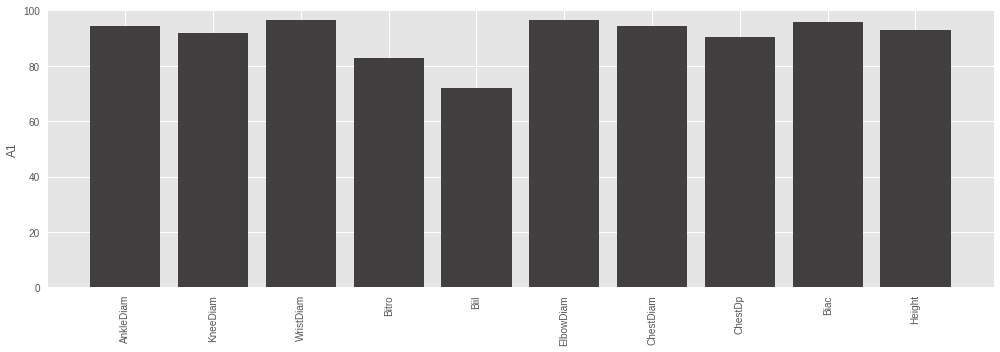

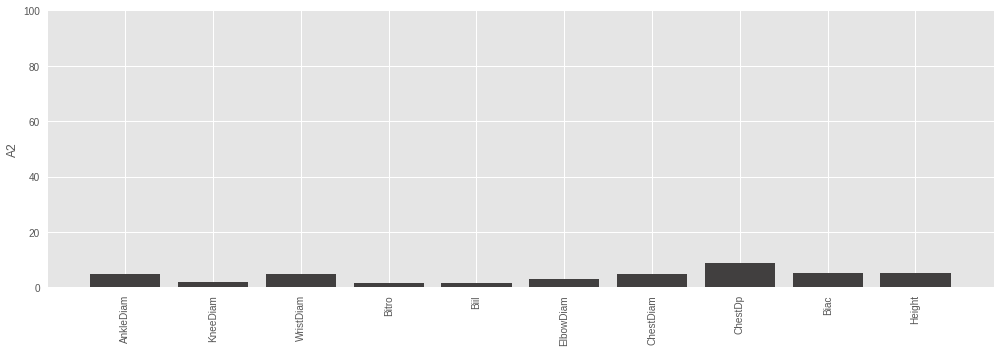

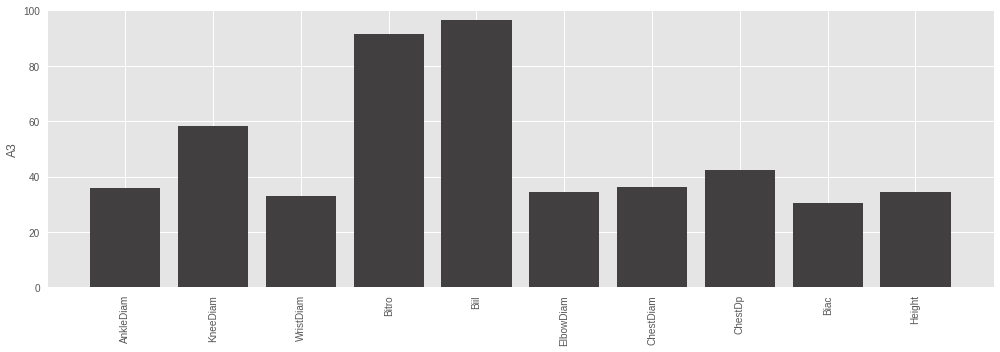

In [21]:
AA.plot_profile(lst_feat)

## Radar plot of profile of archetypes in the feature space

You can also plot the profile of the archetypes in a radar plot. As seen, A1 is extremely high in most features, A2 is extremely low, while A3 is moderate.

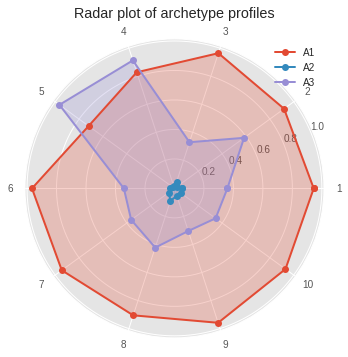

In [22]:
AA.plot_radar_profile(feature_cols = None, Title = 'Radar plot of archetype profiles')

#### Including feature names

You can pass feature names as an argument to get more informed plot.

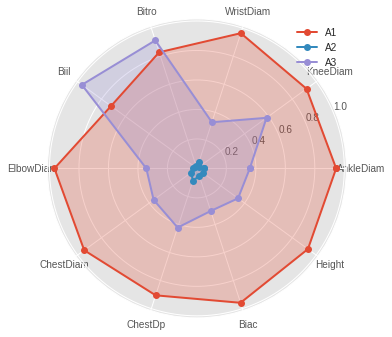

In [23]:
AA.plot_radar_profile(feature_cols = lst_feat, Title = '')

## Finding the most archetypal data points in the set

In [24]:
AA._extract_closes_match()

Attribute **.close_match** contains the most archetypal data points. This attribute is a dictionary where the keys are the archetypes. The first item in the tuple gives the index of the data point. The second item is the corresponding $\alpha$ array of that data point. Alfa can used to map the data point to a simplex plot or display it on a radar plot. It also shows how archetypal the data point is. For instance, in this example we see that **archetype 3** has perfect matching data point in the set. 

In [25]:
AA.close_match

{1: (6, array([ 0.96126367,  0.        ,  0.03873633])),
 2: (300, array([ 0.05130891,  0.94869109,  0.        ])),
 3: (440, array([ 0.        ,  0.00477782,  0.99522218]))}

## Radar plot of archetypal data points in archetype space

It shows the most archetypal data points. As seen, each is inclined toward one archetype.

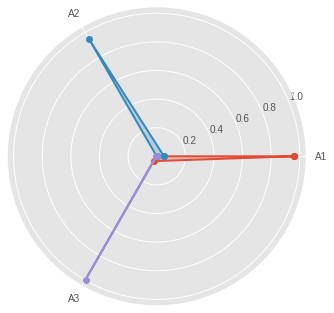

In [26]:
AA.plot_close_match(Title='')

## Radar plot of any data point in archetype space

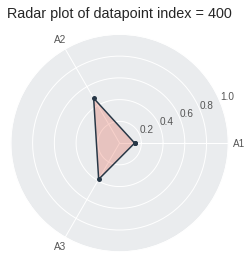

In [27]:
idx = 400
plot_radar_datapoint(AA, X_scaled[idx,:].reshape(1,-1), Title=f'Radar plot of datapoint index = {idx}')

## Parallel axis plot of the data points and archetypes

/datasets/work/D61_APPLML_APPS_WORK/Ben_Motevalli/01_Software_Development/02_Archetypal_Analysis/SCRIPT/archetypes.py:580: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_color.loc[-1] = 'arch'
/apps/python/3.6.1/lib/python3.6/site-packages/numpy-1.12.1-py3.6-linux-x86_64.egg/numpy/core/fromnumeric.py:57: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return getattr(obj, method)(*args, **kwds)


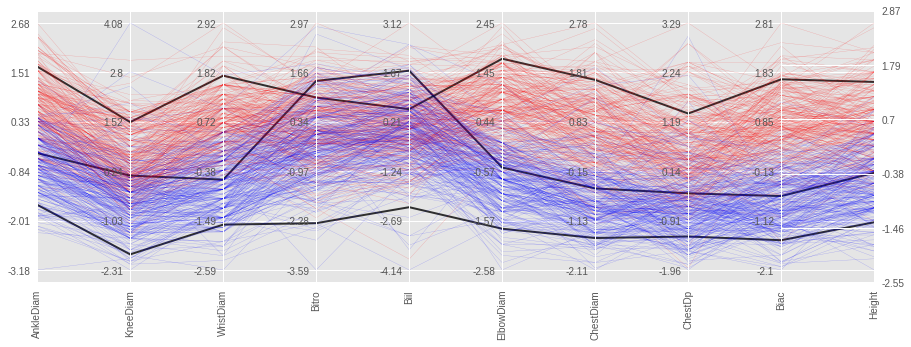

In [28]:
AA.parallel_plot(lst_feat, df_args[['color']], linewidth = '0.3', arch_color = 'black')

# Find an optimal seed number

Note that if you select to **randomly** initialized the archetypes, then the extracted archetypes depend on the initial guess.  Different groups pf archetypes can, together, explain the same variance, but it is possible we might want to find the seed number that maximizes the explained variance. You can use different searching algorithms such as Genetic Algorithm to find the best seed. Here, we simply scan a 1000 seed numbers.<br><br>

**NOTE:** If you select **'furthest_sum'** technique to initialize the archetypes, then, seed number does not have an effect.

In [29]:
seed_numbers = range(1000)
expl_var_old = 0.0
optmal_seed = None

for seed in seed_numbers:    
    AA = ArchetypalAnalysis(n_archetypes = 3, 
                        random_state = seed, 
                        initialize = 'random')
    try:        
        AA.fit(X_scaled)

        if (expl_var_old < AA.explained_variance_):
            expl_var_old = AA.explained_variance_
            optmal_seed = seed
            print(f'Found a new SEED: {seed}: {AA.explained_variance_:12.8f}')
    except:
        print(f'Optimisation failed for SEED: {seed}')

Found a new SEED: 0:   0.73242448
Found a new SEED: 2:   0.73245788
Found a new SEED: 4:   0.73426525
Found a new SEED: 99:   0.73428079


# Additional Exercise:

As an additional excercise you can redo the whole notbook with optimal seed number that was found and see how it impacts the results.